In [1]:
from plot_params import *
import pandas as pd
df=pd.read_csv(outdir / 'Human_annotated_30bp.csv.gz')

In [2]:
df.head()

,Unnamed: 0,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,start_annotation,end_annotation,subseq
0,0,ENST00000000233,0,30,0.000000,0.044434,UTR5,UTR5,CTGCTGCTGCTGCGCCCCATCCCCCCGCGG
1,1,ENST00000000233,15,45,0.000000,0.044434,UTR5,UTR5,CCCATCCCCCCGCGGCCGGCCAGTTCCAGC
2,2,ENST00000000233,30,60,0.000000,0.044434,UTR5,UTR5,CCGGCCAGTTCCAGCCCGCACCCCGCGTCG
3,3,ENST00000000233,45,75,0.000000,0.044434,UTR5,UTR5,CCGCACCCCGCGTCGGTGCCCGCGCCCCTC
4,4,ENST00000000233,60,90,-0.001953,0.042480,UTR5,CDS,GTGCCCGCGCCCCTCCCCGGGCCCCGCCAT


<AxesSubplot:xlabel='start_annotation', ylabel='difference'>

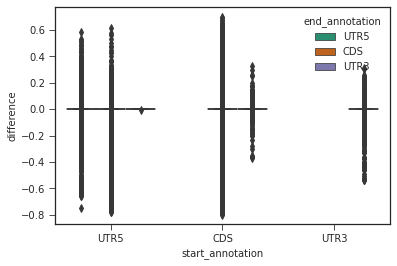

In [3]:
sns.boxplot(df, x = 'start_annotation', y = 'difference', hue = 'end_annotation')

In [4]:
df['gc_content']=df['subseq'].apply(lambda s: (s.count('C')+s.count('G'))/len(s))

<AxesSubplot:>

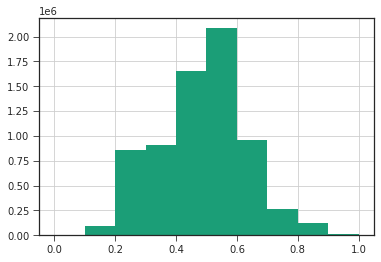

In [5]:
df['gc_content'].hist()

<AxesSubplot:xlabel='gc_content', ylabel='difference'>

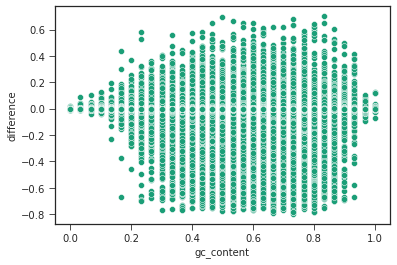

In [6]:
sns.scatterplot(df, x = 'gc_content', y = 'difference')

In [7]:
df['annotation']=df.apply(
    lambda row: 'UTR5' if row['start_annotation']=='UTR5' and row['end_annotation']=='UTR5' else
     'UTR3' if row['start_annotation']=='UTR3' and row['end_annotation']=='UTR3' else 'CDS', axis = 1)

In [8]:
df['annotation'].value_counts()

CDS     3853665
UTR3    2798521
UTR5     317700
Name: annotation, dtype: int64

<AxesSubplot:xlabel='annotation', ylabel='difference'>

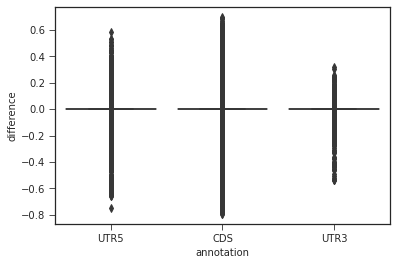

In [9]:
sns.boxplot(df, x = 'annotation', y = 'difference')

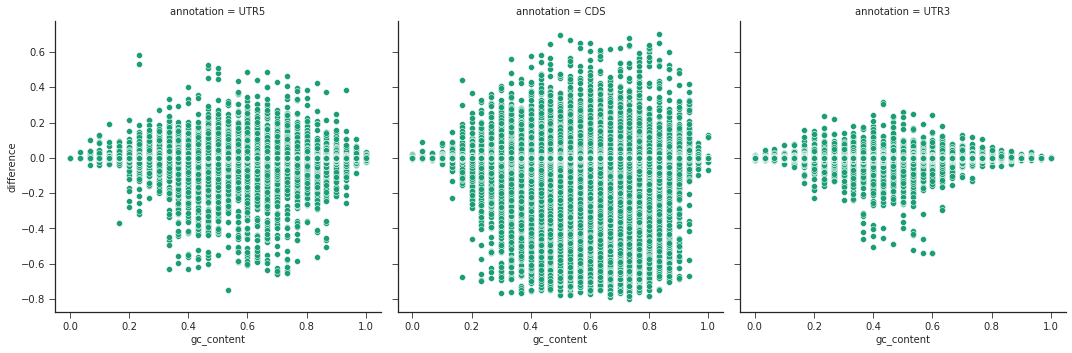

In [10]:
sns.relplot(df, x = 'gc_content', y = 'difference', col = 'annotation')